# Python data structures demo

## Text analysis and generation

In [1]:
import urllib.request

md_url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
md_text = urllib.request.urlopen(md_url).read().decode()

In [2]:
idx = md_text.index('Call me Ishmael')

In [3]:
idx

28842

In [4]:
md_text[idx:idx+100]

'Call me Ishmael. Some years ago—never mind how long precisely—having\r\nlittle or no money in my purse'

In [5]:
md_text[idx:idx+100].split()

['Call',
 'me',
 'Ishmael.',
 'Some',
 'years',
 'ago—never',
 'mind',
 'how',
 'long',
 'precisely—having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse']

In [6]:
md_words = md_text.lower().split()

In [7]:
len(md_words)

215864

In [8]:
md_words_uniq = set(md_words)
len(md_words_uniq)

31821

In [9]:
# compute the frequency of each word in the text
md_word_counts = {}
for w in md_words:
    if w not in md_word_counts:
        md_word_counts[w] = 1
    else:
        md_word_counts[w] += 1

In [10]:
md_word_counts['the']

14511

In [11]:
len(md_word_counts)

31821

In [12]:
list(md_word_counts.items())[:10]

[('\ufeffthe', 1),
 ('project', 87),
 ('gutenberg', 25),
 ('ebook', 8),
 ('of', 6683),
 ('moby-dick;', 5),
 ('or', 775),
 ('the', 14511),
 ('whale,', 212),
 ('by', 1177)]

In [13]:
md_word_counts_sorted = sorted(md_word_counts.items())

In [14]:
md_word_counts_sorted[:10]

[('"defects,"', 1),
 ('"information', 1),
 ('"plain', 2),
 ('"project', 5),
 ('"right', 1),
 ('#2701]', 1),
 ('$20,000,000!', 1),
 ('$5,000)', 1),
 ('$7,000,000.', 1),
 ('&', 2)]

In [15]:
import urllib.request

sw_url = 'https://moss.cs.iit.edu/stopwords.txt'
sw_text = urllib.request.urlopen(sw_url).read().decode()
stopwords = sw_text.split()

In [16]:
stopwords[:20]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being']

In [17]:
# remove stopwords

md_word_counts = { w: n for w,n in md_word_counts.items() if w not in stopwords }

In [18]:
md_word_counts_sorted = sorted(md_word_counts.items(), key=lambda t: t[1], reverse=True)

In [19]:
md_word_counts_sorted[:10]

[('one', 782),
 ('like', 564),
 ('upon', 558),
 ('whale', 532),
 ('now', 501),
 ('old', 426),
 ('will', 358),
 ('though', 311),
 ('chapter', 296),
 ('great', 294)]

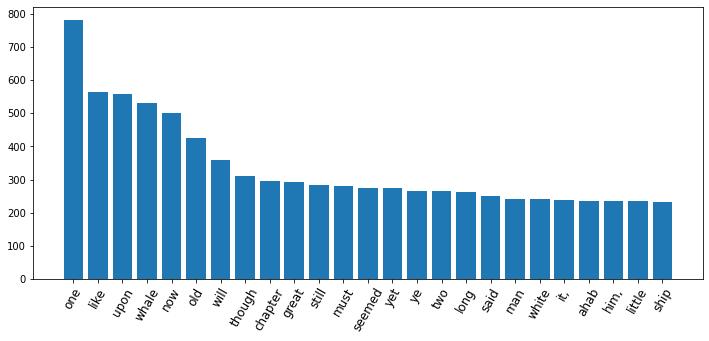

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# need lists of the first n words/counts to plot
n = 25
words  = [t[0] for t in md_word_counts_sorted[:n]]
counts = [t[1] for t in md_word_counts_sorted[:n]]

plt.rcParams['figure.figsize'] = [12, 5]
plt.bar(range(n), counts)
plt.xticks(range(n), words, rotation=60, fontsize=12)
plt.show()

In [21]:
# collect all two-word phrases as tuples
phrases = [md_words[i:i+2] for i in range(len(md_words)-1)]

In [22]:
phrases[:10]

[['\ufeffthe', 'project'],
 ['project', 'gutenberg'],
 ['gutenberg', 'ebook'],
 ['ebook', 'of'],
 ['of', 'moby-dick;'],
 ['moby-dick;', 'or'],
 ['or', 'the'],
 ['the', 'whale,'],
 ['whale,', 'by'],
 ['by', 'herman']]

In [23]:
# map each word to a list of all the words that
# follow it in the text
phrase_dict = {}
for (w1, w2) in phrases:
    if w1 not in phrase_dict:
        phrase_dict[w1] = [w2]
    else:
        phrase_dict[w1].append(w2)

In [24]:
phrase_dict['starboard']

['hand',
 'hand',
 'fluke—look',
 'quarter.',
 'gunwale',
 'bow,',
 'side,',
 'fin.',
 'bow,',
 'side,',
 'fin.”',
 'and',
 'bow,']

In [25]:
# generate a sentence based on two-word phrase statistics
# from Moby Dick
import random

gen_words = ['whale']
for _ in range(10):
    gen_words.append(random.choice(phrase_dict[gen_words[-1]]))

' '.join(gen_words)

'whale is the captain ahab must disobey ourselves; and a long,'

## Solving Sudoku

In [26]:
puzzle_str = '''..3 .2. 6..
                9.. 3.5 ..1
                ..1 8.6 4..

                ..8 1.2 9..
                7.. ... ..8
                ..6 7.8 2..

                ..2 6.9 5..
                8.. 2.3 ..9
                ..5 .1. 3..
                '''

In [27]:
# name all the squares in the game
rows = 'ABCDEFGHI'
cols = '123456789'
squares = [r+c for r in rows for c in cols]

In [28]:
squares[:10]

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1']

In [29]:
def parse_puzzle(puz_str):
    puzzle = [c if c in '123456789' else ''
              for c in puz_str if c not in ' \n']
    return {squares[i]: puzzle[i]
            for i in range(0, len(squares))}

In [30]:
parse_puzzle(puzzle_str)

{'A1': '',
 'A2': '',
 'A3': '3',
 'A4': '',
 'A5': '2',
 'A6': '',
 'A7': '6',
 'A8': '',
 'A9': '',
 'B1': '9',
 'B2': '',
 'B3': '',
 'B4': '3',
 'B5': '',
 'B6': '5',
 'B7': '',
 'B8': '',
 'B9': '1',
 'C1': '',
 'C2': '',
 'C3': '1',
 'C4': '8',
 'C5': '',
 'C6': '6',
 'C7': '4',
 'C8': '',
 'C9': '',
 'D1': '',
 'D2': '',
 'D3': '8',
 'D4': '1',
 'D5': '',
 'D6': '2',
 'D7': '9',
 'D8': '',
 'D9': '',
 'E1': '7',
 'E2': '',
 'E3': '',
 'E4': '',
 'E5': '',
 'E6': '',
 'E7': '',
 'E8': '',
 'E9': '8',
 'F1': '',
 'F2': '',
 'F3': '6',
 'F4': '7',
 'F5': '',
 'F6': '8',
 'F7': '2',
 'F8': '',
 'F9': '',
 'G1': '',
 'G2': '',
 'G3': '2',
 'G4': '6',
 'G5': '',
 'G6': '9',
 'G7': '5',
 'G8': '',
 'G9': '',
 'H1': '8',
 'H2': '',
 'H3': '',
 'H4': '2',
 'H5': '',
 'H6': '3',
 'H7': '',
 'H8': '',
 'H9': '9',
 'I1': '',
 'I2': '',
 'I3': '5',
 'I4': '',
 'I5': '1',
 'I6': '',
 'I7': '3',
 'I8': '',
 'I9': ''}

In [31]:
# what squares fall in the same columns? (list of lists)
vert_units = [[r+c for r in rows] for c in cols]

In [32]:
vert_units

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
 ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
 ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
 ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5'],
 ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6'],
 ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7'],
 ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8'],
 ['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9']]

In [33]:
# what squares fall in the same rows? (list of lists)
horiz_units = [[r+c for c in cols] for r in rows]

In [34]:
horiz_units

[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
 ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9'],
 ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'],
 ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'],
 ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'],
 ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'],
 ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9'],
 ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9'],
 ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']]

In [35]:
# what squares fall in the same "boxes"? (list of lists)
box_units = [[r+c for r in rows[ri:ri+3] for c in cols[ci:ci+3]] 
             for ri in range(0, 9, 3)
             for ci in range(0, 9, 3)]

In [36]:
box_units

[['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3'],
 ['A4', 'A5', 'A6', 'B4', 'B5', 'B6', 'C4', 'C5', 'C6'],
 ['A7', 'A8', 'A9', 'B7', 'B8', 'B9', 'C7', 'C8', 'C9'],
 ['D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3'],
 ['D4', 'D5', 'D6', 'E4', 'E5', 'E6', 'F4', 'F5', 'F6'],
 ['D7', 'D8', 'D9', 'E7', 'E8', 'E9', 'F7', 'F8', 'F9'],
 ['G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3'],
 ['G4', 'G5', 'G6', 'H4', 'H5', 'H6', 'I4', 'I5', 'I6'],
 ['G7', 'G8', 'G9', 'H7', 'H8', 'H9', 'I7', 'I8', 'I9']]

In [37]:
all_units = vert_units + horiz_units + box_units

In [38]:
# associate each square with a list of all the units it belongs to

units = {s: [u for u in all_units if s in u] for s in squares}

In [39]:
units['A1']

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
 ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]

In [40]:
# associate each square with the set of all its "peers" (i.e., all
# other squares that fall into one of its units)

peers = {s: ({s1 for u in units[s] for s1 in u} - {s}) 
         for s in squares}

In [41]:
peers['A1']

{'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'B1',
 'B2',
 'B3',
 'C1',
 'C2',
 'C3',
 'D1',
 'E1',
 'F1',
 'G1',
 'H1',
 'I1'}

In [42]:
# what is a "catch-all" solution?
sol = {s: '123456789' for s in squares}

In [43]:
sol

{'A1': '123456789',
 'A2': '123456789',
 'A3': '123456789',
 'A4': '123456789',
 'A5': '123456789',
 'A6': '123456789',
 'A7': '123456789',
 'A8': '123456789',
 'A9': '123456789',
 'B1': '123456789',
 'B2': '123456789',
 'B3': '123456789',
 'B4': '123456789',
 'B5': '123456789',
 'B6': '123456789',
 'B7': '123456789',
 'B8': '123456789',
 'B9': '123456789',
 'C1': '123456789',
 'C2': '123456789',
 'C3': '123456789',
 'C4': '123456789',
 'C5': '123456789',
 'C6': '123456789',
 'C7': '123456789',
 'C8': '123456789',
 'C9': '123456789',
 'D1': '123456789',
 'D2': '123456789',
 'D3': '123456789',
 'D4': '123456789',
 'D5': '123456789',
 'D6': '123456789',
 'D7': '123456789',
 'D8': '123456789',
 'D9': '123456789',
 'E1': '123456789',
 'E2': '123456789',
 'E3': '123456789',
 'E4': '123456789',
 'E5': '123456789',
 'E6': '123456789',
 'E7': '123456789',
 'E8': '123456789',
 'E9': '123456789',
 'F1': '123456789',
 'F2': '123456789',
 'F3': '123456789',
 'F4': '123456789',
 'F5': '123456789',


In [44]:
# solve sudoku via constraint satisfaction, adapted from Norvig (https://norvig.com/sudoku.html)
#
# constraints:
#   - if a square is assigned a (single) value, eliminate that value from its peers
#   - if a unit has only one square that can hold a given value, assign the value there

def assign(sol, sq, val):
    '''If assigning a value to a square, eliminate all other
    values from that square in the solution.'''
    for other in sol[sq].replace(val, ''):
        eliminate(sol, sq, other)

def eliminate(sol, sq, val):
    '''Eliminate a value from a square. Also check whether
    eliminating a value from the given square narrows down 
    that value to only one affected square; if so, assign 
    the value to that square.'''
    if val not in sol[sq]:
        return
    sol[sq] = sol[sq].replace(val, '')
    if len(sol[sq]) == 1:
        last = sol[sq][0]
        for p in peers[sq]:
            eliminate(sol, p, last)
    for u in units[sq]:
        candidates = [s for s in u if val in sol[s]]
        if len(candidates) == 1:
            assign(sol, candidates[0], val)

In [45]:
def solve_puzzle(puzz_str):
    puz = parse_puzzle(puzz_str)
    sol = {s: '123456789' for s in squares}

    for sq, val in puz.items():
        if val:
            assign(sol, sq, val)
    return sol

In [46]:
solve_puzzle(puzzle_str)

{'A1': '4',
 'A2': '8',
 'A3': '3',
 'A4': '9',
 'A5': '2',
 'A6': '1',
 'A7': '6',
 'A8': '5',
 'A9': '7',
 'B1': '9',
 'B2': '6',
 'B3': '7',
 'B4': '3',
 'B5': '4',
 'B6': '5',
 'B7': '8',
 'B8': '2',
 'B9': '1',
 'C1': '2',
 'C2': '5',
 'C3': '1',
 'C4': '8',
 'C5': '7',
 'C6': '6',
 'C7': '4',
 'C8': '9',
 'C9': '3',
 'D1': '5',
 'D2': '4',
 'D3': '8',
 'D4': '1',
 'D5': '3',
 'D6': '2',
 'D7': '9',
 'D8': '7',
 'D9': '6',
 'E1': '7',
 'E2': '2',
 'E3': '9',
 'E4': '5',
 'E5': '6',
 'E6': '4',
 'E7': '1',
 'E8': '3',
 'E9': '8',
 'F1': '1',
 'F2': '3',
 'F3': '6',
 'F4': '7',
 'F5': '9',
 'F6': '8',
 'F7': '2',
 'F8': '4',
 'F9': '5',
 'G1': '3',
 'G2': '7',
 'G3': '2',
 'G4': '6',
 'G5': '8',
 'G6': '9',
 'G7': '5',
 'G8': '1',
 'G9': '4',
 'H1': '8',
 'H2': '1',
 'H3': '4',
 'H4': '2',
 'H5': '5',
 'H6': '3',
 'H7': '7',
 'H8': '6',
 'H9': '9',
 'I1': '6',
 'I2': '9',
 'I3': '5',
 'I4': '4',
 'I5': '1',
 'I6': '7',
 'I7': '3',
 'I8': '8',
 'I9': '2'}

In [47]:
def print_puzzle(puzz):
    for r in range(9):
        for c in range(9):
            print(f'{puzz[rows[r]+cols[c]]:^5}', end=' ')
            if c == 2 or c == 5:
                print('|', end=' ')
        print()
        if r == 2 or r == 5:
            print('-'*57)

In [48]:
print_puzzle(parse_puzzle(puzzle_str))

              3   |         2         |   6               
  9               |   3           5   |               1   
              1   |   8           6   |   4               
---------------------------------------------------------
              8   |   1           2   |   9               
  7               |                   |               8   
              6   |   7           8   |   2               
---------------------------------------------------------
              2   |   6           9   |   5               
  8               |   2           3   |               9   
              5   |         1         |   3               


In [49]:
print_puzzle(solve_puzzle(puzzle_str))

  4     8     3   |   9     2     1   |   6     5     7   
  9     6     7   |   3     4     5   |   8     2     1   
  2     5     1   |   8     7     6   |   4     9     3   
---------------------------------------------------------
  5     4     8   |   1     3     2   |   9     7     6   
  7     2     9   |   5     6     4   |   1     3     8   
  1     3     6   |   7     9     8   |   2     4     5   
---------------------------------------------------------
  3     7     2   |   6     8     9   |   5     1     4   
  8     1     4   |   2     5     3   |   7     6     9   
  6     9     5   |   4     1     7   |   3     8     2   


In [50]:
# NYTimes "Medium" puzzle
print_puzzle(solve_puzzle('''
.51 8.. 3.6
.3. ... ...
..9 .42 .15

..4 .75 ...
3.. ... ...
.8. 9.. ...

... ... 8..
.1. ..6 .9.
..7 ... ..4
'''))

  4     5     1   |   8     9     7   |   3     2     6   
  7     3     2   |  56    56     1   |   9     4     8   
  8     6     9   |   3     4     2   |   7     1     5   
---------------------------------------------------------
1269   29     4   |  126    7     5   |  126    8     3   
  3     7    56   |  126    8     4   | 1256   56     9   
1256    8    56   |   9    126    3   |   4     7    12   
---------------------------------------------------------
 256    4     3   |   7    125    9   |   8    56    12   
 25     1     8   |   4     3     6   |  25     9     7   
2569   29     7   |  125   125    8   | 1256    3     4   


## California Housing Data

In [51]:
# NB: makes use of housing data included in Google Colab sample datasets

csv_file = 'sample_data/california_housing_train.csv'
with open(csv_file) as infile:
    print(infile.readline())

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"



In [52]:
# load CSV file contents into a dictionary
housing_data = {}

with open(csv_file) as infile:
    cols = infile.readline().split(',')
    for col in cols:
        housing_data[col] = []
    for line in infile:
        data = line.split(',')
        for i in range(len(cols)):
            housing_data[cols[i]].append(float(data[i]))

In [53]:
housing_data['"population"'][:10]

[1015.0, 1129.0, 333.0, 515.0, 624.0, 671.0, 1841.0, 375.0, 3134.0, 787.0]

In [54]:
sum(housing_data['"population"']) / len(housing_data['"population"'])

1429.5739411764705

### Specialized data structure: Pandas DataFrame

In [55]:
import pandas

df = pandas.read_csv('sample_data/california_housing_train.csv')

In [56]:
df['population'][:10]

0    1015.0
1    1129.0
2     333.0
3     515.0
4     624.0
5     671.0
6    1841.0
7     375.0
8    3134.0
9     787.0
Name: population, dtype: float64

In [57]:
df['population'].mean()

1429.5739411764705